# Titanic Dataset

## Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset = pd.read_csv('tested.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [4]:
print("dataset Data Size  :" ,dataset.size)
print("dataset Data Shape :" ,dataset.shape)

dataset Data Size  : 5016
dataset Data Shape : (418, 12)


##  Data Visualization

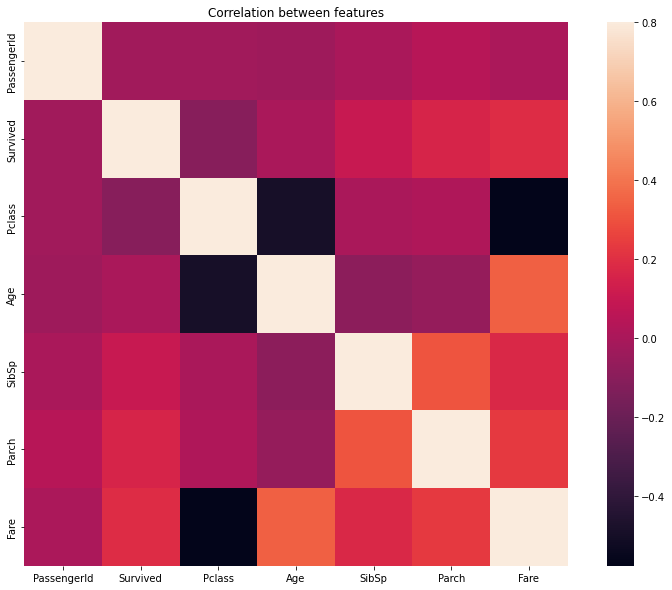

In [5]:
corr=dataset.corr()#["Survived"]
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, square=True)
plt.title('Correlation between features')
plt.show()

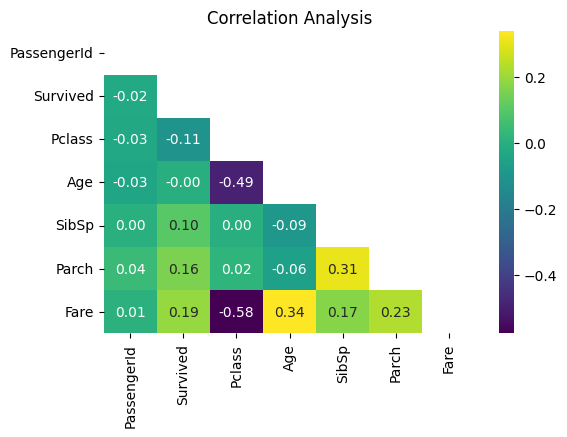

In [6]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=True,lw=0,linecolor='white',cmap='viridis',fmt = "0.2f")
plt.xticks(rotation=90)
plt.yticks(rotation = 0)
plt.show()

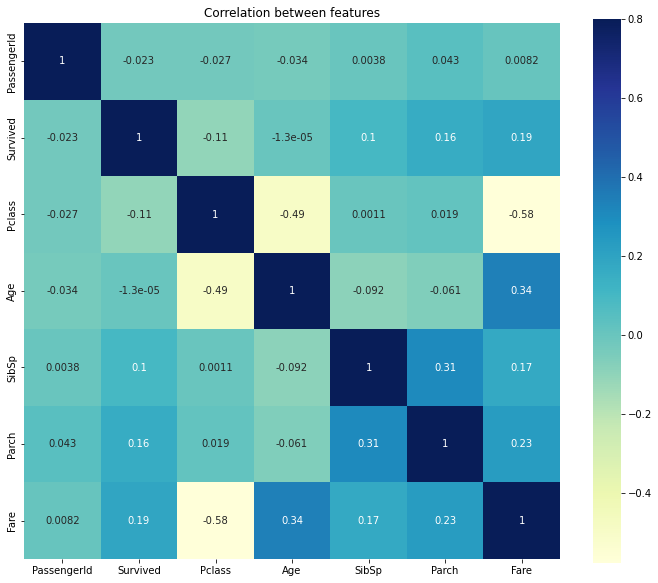

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, vmax=.8, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

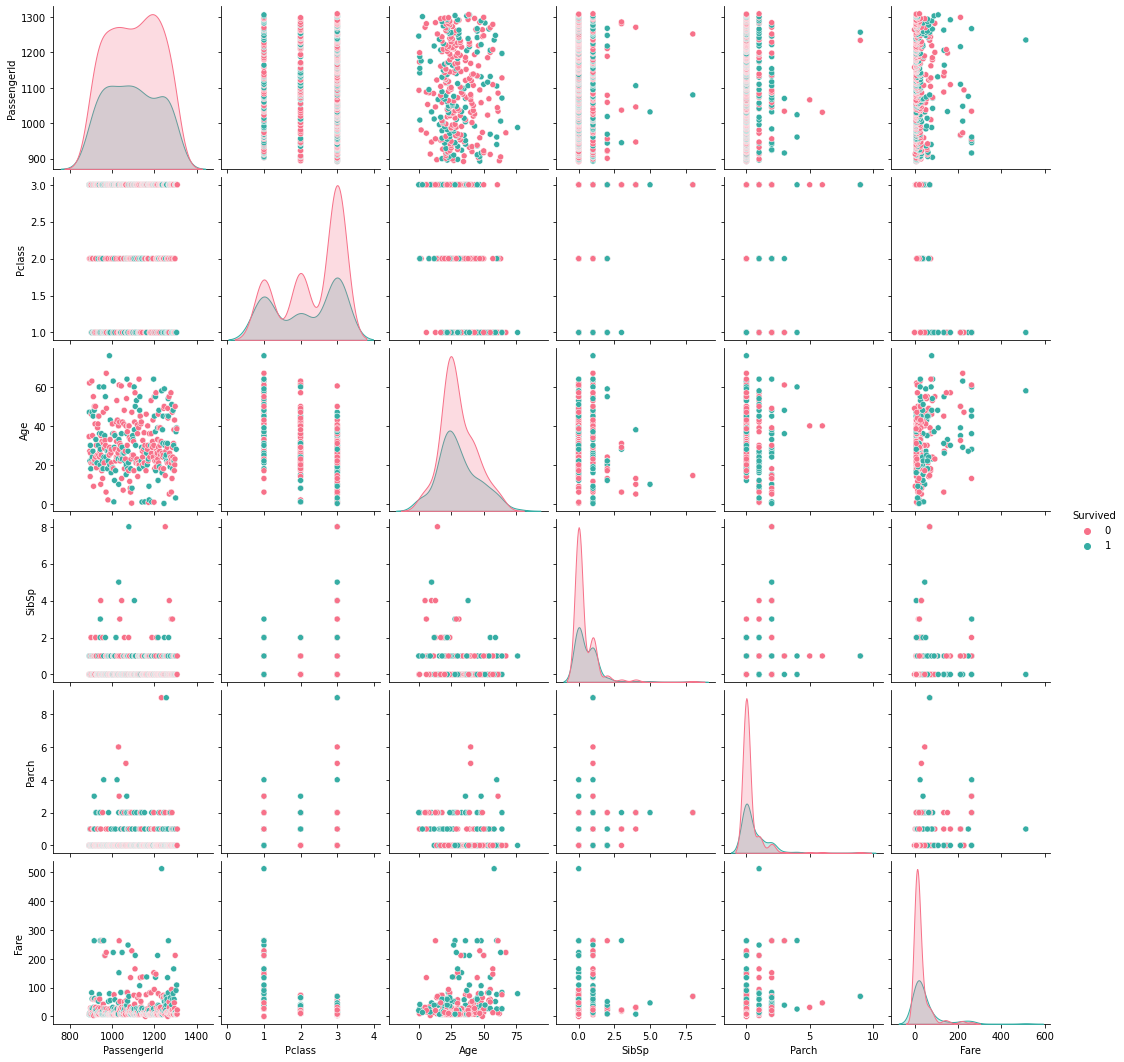

In [8]:
sns.pairplot(dataset,hue='Survived',palette='husl') 
plt.show()

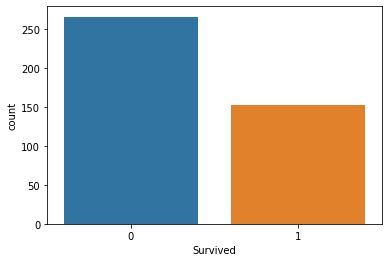

In [9]:
sns.axes_style('whitegrid')
sns.countplot(x='Survived',data=dataset)
plt.show()

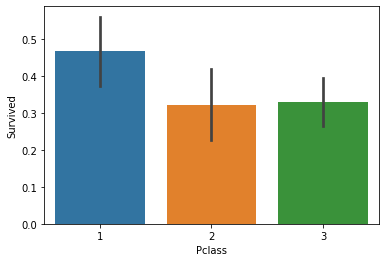

In [10]:
sns.blend_palette(['red','blue'])
sns.barplot(x='Pclass',y='Survived',data=dataset)
plt.show()

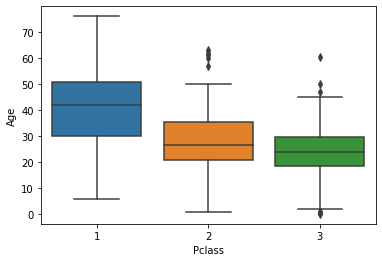

In [11]:
sns.boxplot(x='Pclass',y='Age',data=dataset)    # Age is the variable to be plotted
plt.show()

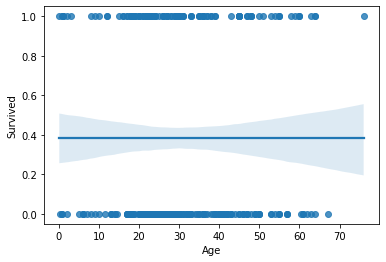

In [12]:
sns.regplot(x='Age',y='Survived',data=dataset)  # Age is the variable to be plotted
plt.show()

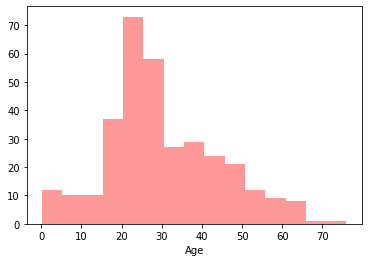

In [13]:
sns.distplot(dataset['Age'].dropna(),kde=False,color='red')
plt.show()

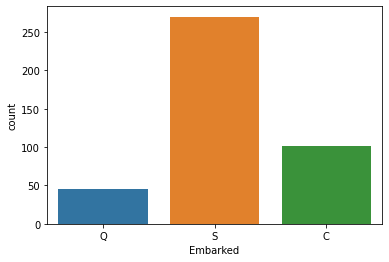

In [14]:
sns.axes_style('whitegrid') 
sns.countplot(x='Embarked',data=dataset)
plt.show()

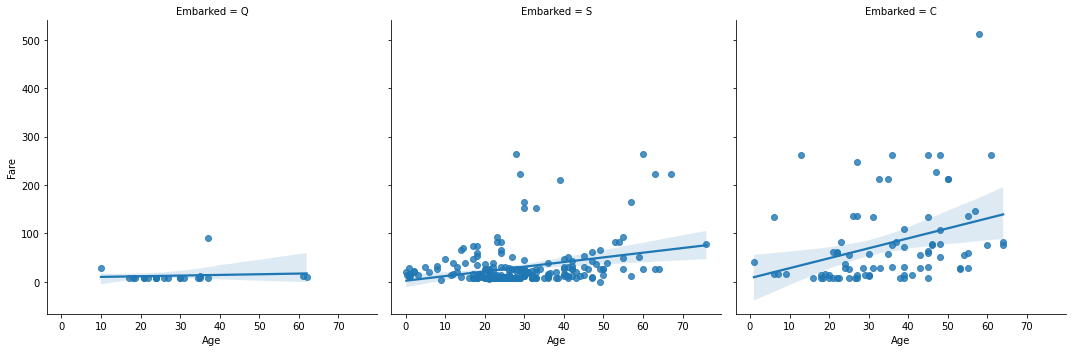

In [15]:
 sns.lmplot(x="Age", y="Fare", col="Embarked", data=dataset)

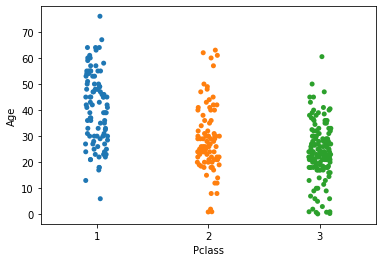

In [16]:
sns.stripplot(x='Pclass',y='Age',data=dataset)  
plt.show()

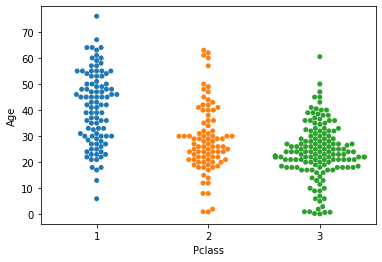

In [17]:
sns.swarmplot(x='Pclass',y='Age',data=dataset)  
plt.show()

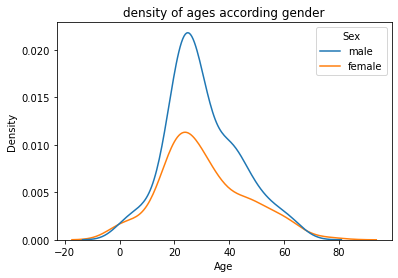

In [18]:
#what average of ages in each categorey 
sns.kdeplot(data = dataset , x ="Age" , hue ="Sex" )
plt.title("density of ages according gender")
plt.show()

          Pclass
Sex             
female  2.144737
male    2.334586


<AxesSubplot:xlabel='Sex'>

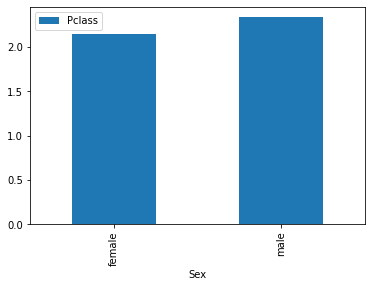

In [19]:
# pivot on sex
Sex_pivot = dataset.pivot_table(index ='Sex',values="Pclass")
print(Sex_pivot)
Sex_pivot.plot.bar()

        Survived
Pclass          
1       0.467290
2       0.322581
3       0.330275


<AxesSubplot:xlabel='Pclass'>

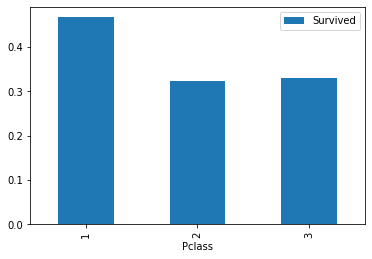

In [20]:
# pivot chart
Sex_pivot = dataset.pivot_table(index ='Pclass',values="Survived")
print(Sex_pivot)
Sex_pivot.plot.bar()

,Survived
Pclass,
1,107
2,93
3,218


<AxesSubplot:xlabel='Pclass'>

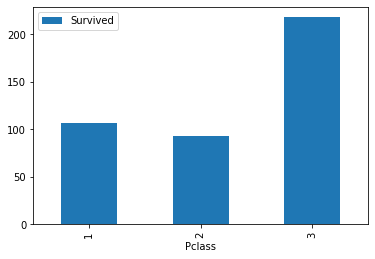

In [21]:
survival_rate = dataset.groupby(['Pclass']).count()[['Survived']]
display(survival_rate)
survival_rate.plot.bar()

# Feature Engineering

In [22]:
## Finding the Null value in data
dataset.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

## Removing the null value from the dataset

In [23]:
# Filled the missing value in Age column with the mean value
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

# Filled the missing value in Fare columns with mean Value
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())

# Filled the missing value in Embarked columns with backfill method
dataset['Embarked'] = dataset['Embarked'].fillna(method='backfill')

In [24]:
# Drop the columns 
dataset = dataset.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
dataset.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S


## Categorical value is converted into numerical value by using categorical_encoder

In [25]:
# Converting the categorical variable into the numerical variable by using category_encoder
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
dataset_encoded = encoder.fit_transform(dataset)
dataset_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,34.5,0,0,7.8292,1
1,2,1,2,47.0,1,0,7.0000,2
2,1,2,1,62.0,0,0,9.6875,1
3,1,1,1,27.0,0,0,8.6625,2
4,2,1,2,22.0,1,1,12.2875,2


## Splitting Independent and Dependent Variable

In [26]:
X = dataset_encoded.drop(['Survived'],axis=1)
y = dataset['Survived']

## Splitting the dataset into train and test set

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
print(X_train)

[[ 1.52873521  1.3648242   2.5493644  ...  1.63648214  0.80538381
   1.45647708]
 [-0.85838073 -0.7326951  -2.29203154 ...  1.63648214 -0.36952044
  -0.23118684]
 [ 0.33517724 -0.7326951   0.11612002 ... -0.41879866 -0.39344287
  -0.23118684]
 ...
 [-0.85838073 -0.7326951   0.45829501 ... -0.41879866 -0.31825808
  -0.23118684]
 [-0.85838073 -0.7326951  -0.01523029 ... -0.41879866 -0.48614231
  -0.23118684]
 [ 0.33517724 -0.7326951  -0.49219108 ... -0.41879866 -0.43616151
  -0.23118684]]


In [30]:
print(X_test)

[[-0.85838073 -0.7326951  -1.5567355   3.71833886  0.60884174 -0.11790769
  -1.91885076]
 [ 1.52873521  1.3648242   1.33274221  0.55594581 -0.41879866  1.20295246
   1.45647708]
 [ 1.52873521  1.3648242   1.71293665 -0.49818521 -0.41879866 -0.14660094
   1.45647708]
 [-0.85838073  1.3648242  -0.64426885  1.61007683 -0.41879866 -0.4675597
  -0.23118684]
 [ 0.33517724  1.3648242  -0.79634663 -0.49818521 -0.41879866  0.01238414
  -0.23118684]
 [ 0.33517724  1.3648242  -0.79634663  1.61007683  0.60884174 -0.22256834
  -0.23118684]
 [ 0.33517724 -0.7326951  -2.16504659  0.55594581  0.60884174 -0.22256834
  -0.23118684]
 [-0.85838073 -0.7326951  -0.72030774  1.61007683 -0.41879866 -0.20291777
  -0.23118684]
 [ 1.52873521  1.3648242  -0.01523029 -0.49818521 -0.41879866 -0.14190189
   1.45647708]
 [ 0.33517724 -0.7326951  -0.26407442 -0.49818521 -0.41879866 -0.35869896
   1.45647708]
 [ 1.52873521  1.3648242   3.46183105  0.55594581 -0.41879866  0.73176593
  -0.23118684]
 [ 1.52873521 -0.73269

## Training the Logistic Regression model on the Training set

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [32]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## Making the Confusion Matrix

Text(42.0, 0.5, 'predicted label')

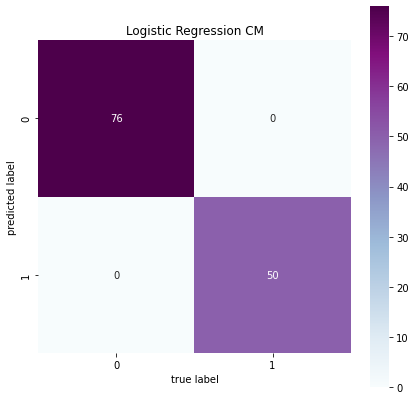

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


## plotting confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
plt.title("Logistic Regression CM")
sns.heatmap(cm, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

## Computing the accuracy with k-Fold Cross Validation

In [34]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


## Random forest classification

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## Predicting a new result

In [36]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## Making the Confusion Matrix

Text(42.0, 0.5, 'predicted label')

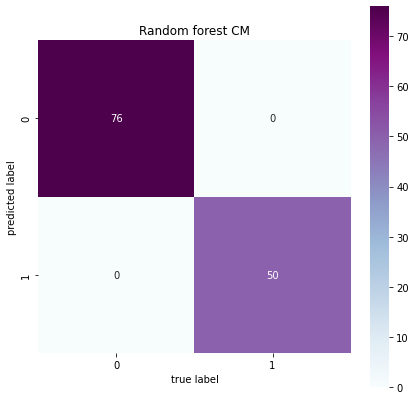

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


## plotting confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
plt.title("Random forest CM")
sns.heatmap(cm, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

## Computing the accuracy with k-Fold Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


## XGBoost

In [39]:
import xgboost as xgb
classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
classifier.fit(X_train, y_train)
        


[12:24:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

## Predicting a new result

In [40]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## Making the Confusion Matrix

Text(42.0, 0.5, 'predicted label')

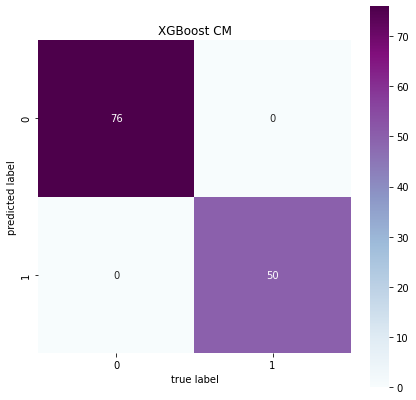

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


## plotting confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
plt.title("XGBoost CM")
sns.heatmap(cm, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

## Computing the accuracy with k-Fold Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[12:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## AdaBoost

In [43]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1)
classifier.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

## Predicting a new result

In [44]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## Making the Confusion Matrix

Text(42.0, 0.5, 'predicted label')

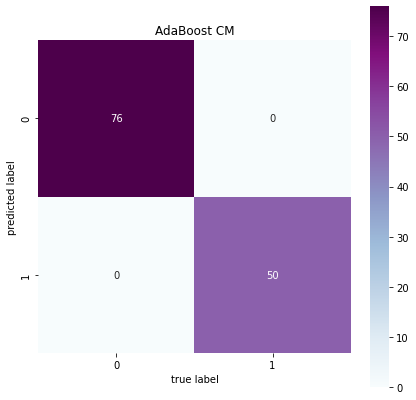

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


## plotting confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
plt.title("AdaBoost CM")
sns.heatmap(cm, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

## Computing the accuracy with k-Fold Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


## Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 1)
classifier.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=1)

## Predicting a new results

In [48]:
y_pred = classifier.predict(X_test)
y_pred


array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## Making The confusion matrix

Text(42.0, 0.5, 'predicted label')

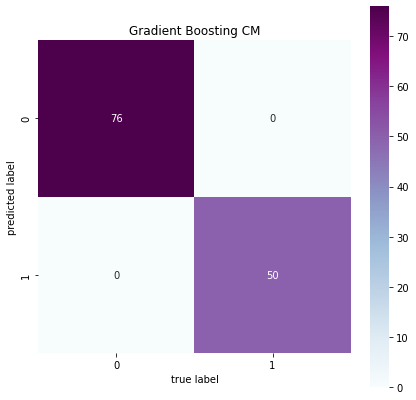

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

## plotting confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
plt.title("Gradient Boosting CM")
sns.heatmap(cm, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

## Computing the accuracy with k-Fold Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


## Voting Classifier

In [51]:
from sklearn.ensemble import VotingClassifier
classifier1 = LogisticRegression(random_state = 0)
classifier2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier3 = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
classifier4 = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.1)
classifier5 = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 1)
classifier = VotingClassifier(estimators = [('lr', classifier1), ('rf', classifier2), ('xgb', classifier3), ('ada', classifier4), ('gb', classifier5)], voting = 'hard')
classifier.fit(X_train, y_train)

    



[12:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     random_state=0)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, gamma=0,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.05,
                                            max_de...
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints=None,
   

## predicting a new results 

In [52]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## Making the confusion matrix

Text(42.0, 0.5, 'predicted label')

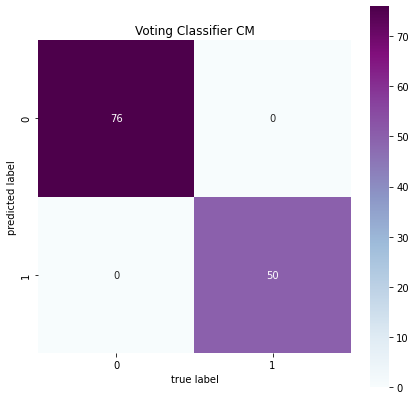

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

## plotting confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
plt.title("Voting Classifier CM")
sns.heatmap(cm, square=True,cmap="BuPu",annot=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

## Computing the accuracy with k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))